In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("Classified Data", index_col=0)

In [5]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()

In [10]:
scaler.fit(df.drop("TARGET CLASS", axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [14]:
scaled_feature = scaler.transform(df.drop("TARGET CLASS", axis=1))

In [15]:
scaled_feature

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [18]:
df_feat = pd.DataFrame(scaled_feature, columns=df.columns[:-1])

In [19]:
from sklearn.model_selection import train_test_split

In [21]:
x = df_feat
y = df['TARGET CLASS']

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.3, random_state = 10)

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
knn = KNeighborsClassifier(n_neighbors=1)

In [26]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [27]:
pred = knn.predict(x_test)

In [28]:
from sklearn.metrics import classification_report, confusion_matrix

In [29]:
print(confusion_matrix(y_test, pred))

[[152  17]
 [  9 122]]


In [30]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       169
           1       0.88      0.93      0.90       131

   micro avg       0.91      0.91      0.91       300
   macro avg       0.91      0.92      0.91       300
weighted avg       0.92      0.91      0.91       300



In [31]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

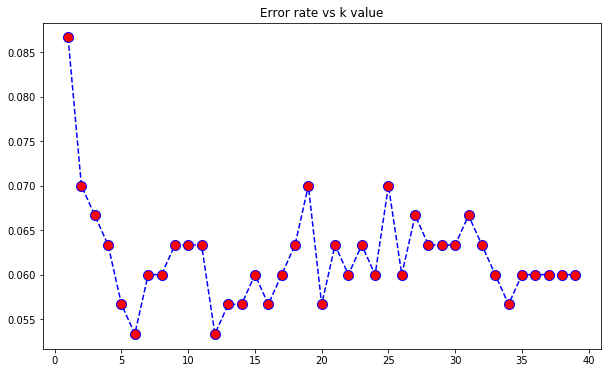

In [44]:
plt.figure(figsize= (10,6))
plt.plot(range(1,40), error_rate, color = "blue", linestyle = "dashed", marker = "o",markerfacecolor = "red",markersize = 10)
plt.title('Error rate vs k value')
plt.xlabel = "k"
plt.ylabel = "error rate"

In [46]:
Knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)
pred = knn.predict(x_test)
print(confusion_matrix(y_test, pred))
print('/n')
print(classification_report(y_test, pred))

[[155  14]
 [  4 127]]
/n
              precision    recall  f1-score   support

           0       0.97      0.92      0.95       169
           1       0.90      0.97      0.93       131

   micro avg       0.94      0.94      0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300

